In [1]:
!unzip DataScienceJobSalaries.zip

Archive:  DataScienceJobSalaries.zip
  inflating: ds_salaries.csv         


In [6]:
import pandas as pd
salary = pd.read_csv('ds_salaries.csv')
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [10]:
salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [12]:
salary.duplicated().sum()

0

In [13]:
print(salary['experience_level'].unique())

['MI' 'SE' 'EN' 'EX']


In [14]:
print(salary['employment_type'].unique())

['FT' 'CT' 'PT' 'FL']


In [15]:
print(salary['job_title'].unique())

['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Finance Data Anal

In [17]:
specialty_group = {
    'Data Scientist': 'Data Scientists',
    'Machine Learning Scientist': 'Machine Learning',
    'Big Data Engineer': 'Data Engineers',
    'Product Data Analyst': 'Analysts',
    'Machine Learning Engineer': 'Machine Learning',
    'Data Analyst': 'Analysts',
    'Lead Data Scientist': 'Data Scientists',
    'Business Data Analyst': 'Analysts',
    'Lead Data Engineer': 'Data Engineers',
    'Lead Data Analyst': 'Analysts',
    'Data Engineer': 'Data Engineers',
    'Data Science Consultant': 'Data Scientists',
    'BI Data Analyst': 'Analysts',
    'Director of Data Science': 'Managers and Directors',
    'Research Scientist': 'Data Scientists',
    'Machine Learning Manager': 'Managers and Directors',
    'Data Engineering Manager': 'Managers and Directors',
    'Machine Learning Infrastructure Engineer': 'Machine Learning',
    'ML Engineer': 'Machine Learning',
    'AI Scientist': 'Machine Learning',
    'Computer Vision Engineer': 'Machine Learning',
    'Principal Data Scientist': 'Data Scientists',
    'Data Science Manager': 'Managers and Directors',
    'Head of Data': 'Managers and Directors',
    '3D Computer Vision Researcher': 'Machine Learning',
    'Data Analytics Engineer': 'Data Engineers',
    'Applied Data Scientist': 'Data Scientists',
    'Marketing Data Analyst': 'Analysts',
    'Cloud Data Engineer': 'Data Engineers',
    'Financial Data Analyst': 'Analysts',
    'Computer Vision Software Engineer': 'Machine Learning',
    'Director of Data Engineering': 'Managers and Directors',
    'Data Science Engineer': 'Data Scientists',
    'Principal Data Engineer': 'Data Engineers',
    'Machine Learning Developer': 'Machine Learning',
    'Applied Machine Learning Scientist': 'Machine Learning',
    'Data Analytics Manager': 'Managers and Directors',
    'Head of Data Science': 'Managers and Directors',
    'Data Specialist': 'Data Scientists',
    'Data Architect': 'Data Engineers',
    'Finance Data Analyst': 'Analysts',
    'Principal Data Analyst': 'Analysts',
    'Big Data Architect': 'Data Engineers',
    'Staff Data Scientist': 'Data Scientists',
    'Analytics Engineer': 'Data Engineers',
    'ETL Developer': 'Data Engineers',
    'Head of Machine Learning': 'Managers and Directors',
    'NLP Engineer': 'Machine Learning',
    'Lead Machine Learning Engineer': 'Machine Learning',
    'Data Analytics Lead': 'Managers and Directors'
}

salary['job_title'] = salary['job_title'].map(specialty_group)

print(salary['job_title'].unique())

['Data Scientists' 'Machine Learning' 'Data Engineers' 'Analysts'
 'Managers and Directors']


In [25]:
experience_order = ['EN', 'MI', 'SE', 'EX']
salary['experience_level'] = pd.Categorical(salary['experience_level'], categories=experience_order, ordered=True)


<ipython-input-26-2a0df1c6839a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_experience = salary.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean().reset_index()


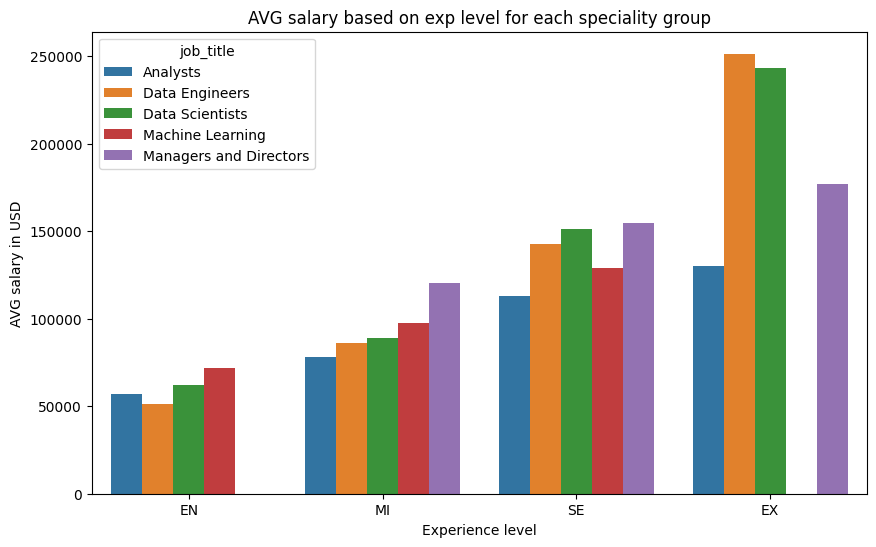

In [26]:
salary_by_experience = salary.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=salary_by_experience, x='experience_level', y='salary_in_usd', hue='job_title')
plt.title('AVG salary based on exp level for each speciality group')
plt.xlabel('Experience level')
plt.ylabel('AVG salary in USD')
plt.show()